# Iris Flower Classification
 **Performed by:** <br>
 Name: Giridhar Sreekumar <br>
 Date: 9 January 2026

# **Description:** Classify iris flowers into three species (setosa, versicolor, virginica) based on  features like petal and sepal length/width using classification algorithms.

In [46]:
## Initially, all the required libraries are imported.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
## Iris Dataset is loaded from sklearn datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names) ## These are basically the input features.
df['Species']=iris.target ## This is our output/label which we are expected to predict.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis (EDA)

The purpose of this exploratory data analysis is to understand the **structure**, **distribution**, and **relationships** within the Iris dataset. The dataset contains four numerical features—sepal length, sepal width, petal length, and petal width which are used to classify iris flowers into three species: setosa, versicolor, and virginica.

EDA is performed using summary statistics and visualizations to **identify patterns**, **feature separability**, and **variability** in the data. The insights obtained from this step help in selecting appropriate features and models for the classification task.


### **Initial Analysis**

Initial analysis is performed to gain a basic understanding of the dataset and its structure. This step involves examining the number of observations and features, data types, and the presence of missing or duplicate values. Basic descriptive statistics such as measures of central tendency and dispersion are also analyzed to understand the overall distribution and range of the features.

This analysis helps in assessing the quality of the dataset and determining whether any data cleaning or preprocessing steps are required before proceeding with detailed visualization and modeling.


In [16]:
df.shape    ###Info on no of rows and columns

(150, 5)

In [24]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [17]:
df.info()    ###Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


***Missing and duplicate values are checked***

In [21]:
df.isnull().mean() * 100

,0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0
petal width (cm),0.0
Species,0.0


In [22]:
df.duplicated().sum()


np.int64(1)

In [26]:
###Data type validation
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
Species,int64


In [27]:
### Descriptive Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
###Target Variable Analysis
df['Species'].value_counts() #Gives info on tuple counts for different species

,count
Species,
0,50
1,50
2,50


Initial Analysis have been completed and since the presence of a duplicate entry has been found, it is supposed to be removed.


In [31]:
df = df.drop_duplicates().reset_index(drop=True) ##Retains the first occurence and deletes the duplicates

### Conclusion of Initial Analysis

The initial analysis provided an overview of the dataset structure, data types, and basic statistical properties. The dataset was found to be with zero missing values and only a single duplicate record. Since only minimal cleaning was required, it was performed and  the dataset is suitable for further exploratory analysis and visualization to understand feature relationships and class separability.


In [ ]:
## =======================================================================

# Visualisation
Now that the data is cleaned and the structure is verified, let’s use **visualizations** to uncover underlying patterns, correlations, and distributions within the features."

## 1. Pair Plot





*    It helps us in understanding relationship between features and in observing class separability.







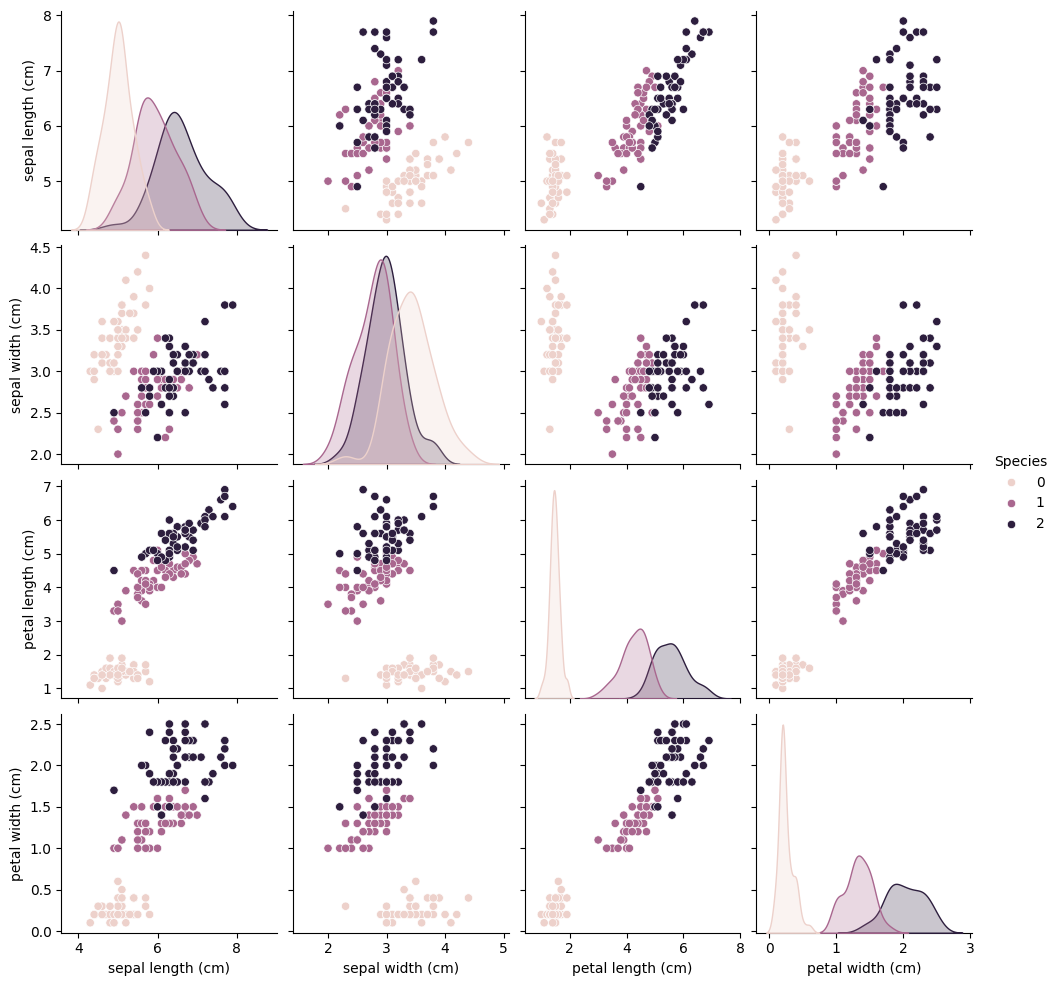

In [34]:
sns.pairplot(df,hue='Species')
plt.show()

## 2. Histogram

* It helps us in understanding the distribution and spread of each feature.




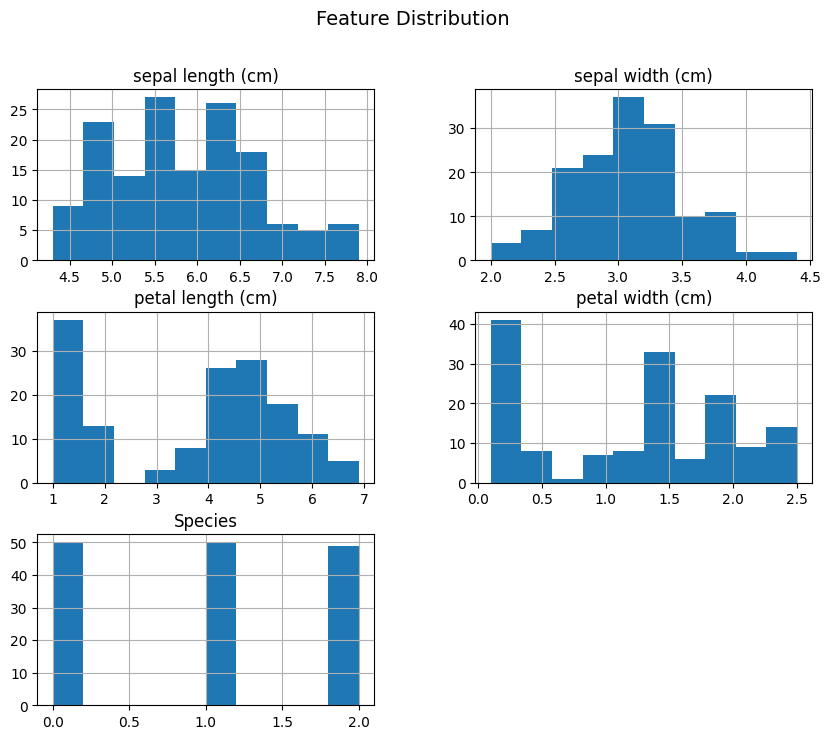

In [35]:
df.hist(figsize=(10,8))
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

## 3. Box Plots
* It helps us in understanding spread of features across species.
* It helps us in identifying outliers.

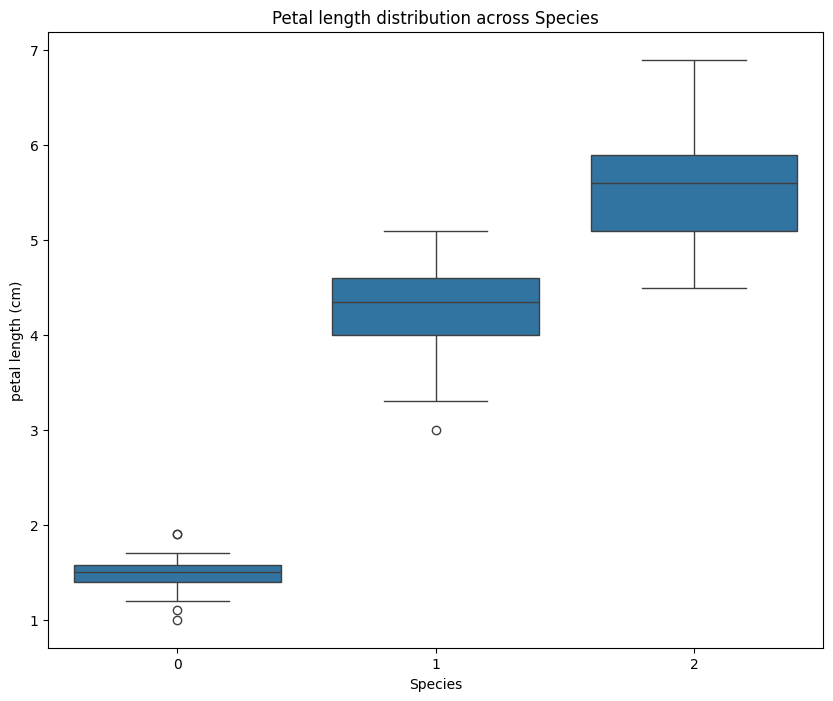

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Species',y='petal length (cm)', data=df)
plt.title("Petal length distribution across Species")
plt.show()

## 4. Scatter Plot
* It visualize how well classes separate.
* Petal feature works best for iris

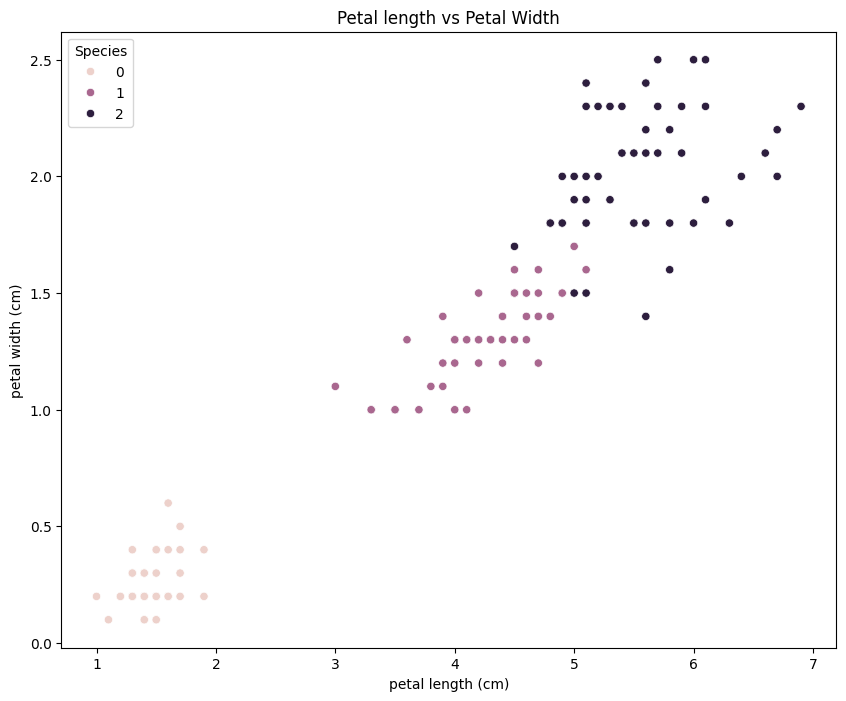

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='petal length (cm)',y='petal width (cm)', hue='Species', data=df)
plt.title("Petal length vs Petal Width")
plt.show()

## Visualisation Summary
Based on the insights obtained from the visual analysis, the dataset shows clear patterns and separability among classes, making it suitable for applying classification algorithms.


In [ ]:
## =====================================================================

## Model Training and Evaluation

**-** After completing exploratory data analysis and Visualisation, the dataset is prepared for building a classification model.
  In this step, we'll be dividing the dataset into training and testing sets to evaluate the model's perfomance on unseen data. A classification algorithm is then trained using the training data, followed by evaluating its accuracy using appropriate perfomance metric.


In [42]:
##  ========================= TRAIN/TEST SPLIT ============================

X=df.drop('Species',axis=1) ## Removes our target variable from feature set.
y=df['Species']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
## ======================== MODEL ==========================
model=LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

**Reasoning:** A model has been trained using logistic regression. The efficiency of the model is evaluated in the next step.

In [50]:
## ======================== PREDICTION ========================================

y_pred=model.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)
report= classification_report(y_test,y_pred)

print("Accuracy:",accuracy)
print("\nConfusion Matrix:", cm)
print("\nClassification Report:", report)

Accuracy: 1.0

Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



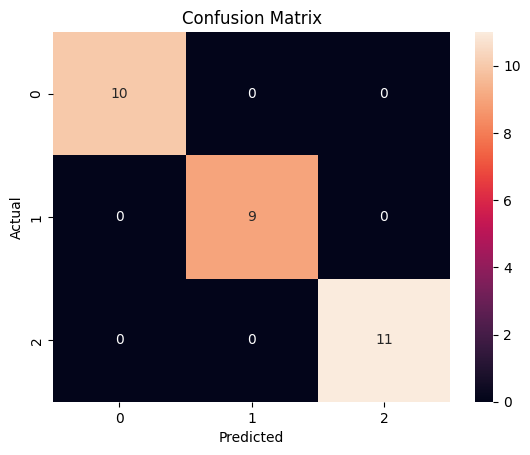

In [53]:
## Confusion Matrix Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Conclusion of Model Evaluation

The trained classification model demonstrated high accuracy on the test dataset. The confusion matrix and classification report indicates that model effectively
classifies the iris species with minimal misclassification. These results confirms that the selected features are suitable for the classification task and the model performs well on unseen data.


**------------------------------- Conclusion --------------------**

* The Iris Dataset was successfully analyzed to understand its structure, features, and target classes.
* Initial Analysis confirmed that the dataset was clean, well-structures, and required no preprocessing or cleaning.
* Exploratory Data Analysis and Visualisations revealed clear patterns and strong feature separability among the species.
* The dataset was split into training and testing sets to evaluate model perfomance on unseen data.
* A Logistic Regression classifier was trained and achieved high accuracy on the test dataset.
* The results demonstrate that the selected features are effective for classifying iris flower species.
